## Bayesian state of mind
In simple terms, Bayesian inference is simply updating your beliefs after considering new evidence.

In Bayesian world probability is measure of believability in an event, that is, how confident we are in an event occurring, whereas in, Frequentist world (classical version of statistics), assume that probability is the long-run frequency of events. 

For example, the probability of plane accidents under a frequentist philosophy is interpreted as the long-term frequency of plane accidents. This makes logical sense for many probabilities of events, but becomes more difficult to understand when events have no long-term frequency of occurrences. 

Bayesians, on the other hand, have a more intuitive approach. Bayesians interpret a probability as measure of belief, or confidence, of an event occurring. An individual who assigns a belief of 0 to an event has no confidence that the event will occur; conversely, assigning a belief of 1 implies that the individual is absolutely certain of an event occurring. Beliefs between 0 and 1 allow for weightings of other outcomes. 

For eg: 
* Your code either has a bug in it or not, but we do not know for certain which is true, though we have a belief about the presence or absence of a bug.
* A medical patient is exhibiting symptoms x, y and z. There are a number of diseases that could be causing all of them, but only a single disease is present. A doctor has beliefs about which disease, but a second doctor may have slightly different beliefs.


### Notations:
* We denote our belief about event A as P(A). We call this quantity the prior probability.
* After we see evidence, we update our beliefs. We denote our updated belief as P(A|X), interpreted as the probability of A given the evidence X. 
* We call the updated belief the posterior probability so as to contrast it with the prior probability. 

### NOTE:

In bayesian world, we dono't completely discard the prior belief after seeing new evidence X, but we re-weighted the prior to incorporate the new evidence (i.e. we put more weight, or confidence, on some beliefs versus others).

By introducing prior uncertainty about events, we are already admitting that any guess we make is potentially very wrong. After observing data, evidence, or other information, we update our beliefs, and our guess becomes less wrong. 

#### NOTE:

Denote N as the number of instances of evidence we possess. As we gather an infinite amount of evidence, say as N→∞, our Bayesian results (often) align with frequentist results. Hence for large N, statistical inference is more or less objective. 

On the other hand, for small N, inference is much more unstable: frequentist estimates have more variance and larger confidence intervals. This is where Bayesian analysis excels. By introducing a prior, and returning probabilities (instead of a scalar estimate), we preserve the uncertainty that reflects the instability of statistical inference of a small N dataset.

## Bayesian Framework

Updating our belief is done via the following equation, known as Bayes' Theorem:

![Bayes Thereom](https://github.com/pradeepsinngh/Notes-on-Bayesian-Inference/blob/master/images/bayes_thereom.png)


In [7]:
# Example coin-flip example

In [3]:

%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)

import scipy.stats as stats

In [4]:
dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

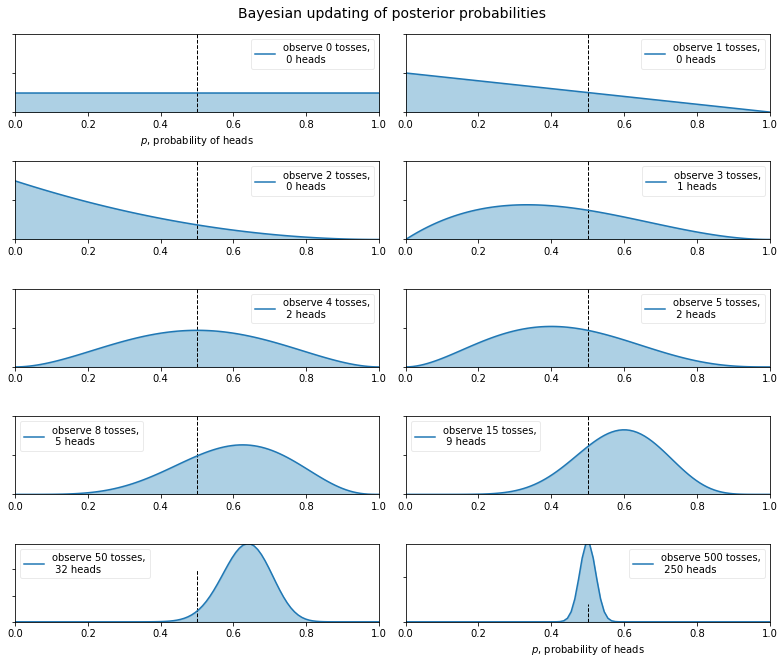

In [5]:
# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials)/2, 2, k+1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()


The posterior probabilities are represented by the curves, and our uncertainty is proportional to the width of the curve. As the plot above shows, as we start to observe data our posterior probabilities start to shift and move around. Eventually, as we observe more and more data (coin-flips), our probabilities will tighten closer and closer around the true value of p=0.5

Notice that the plots are not always peaked at 0.5. There is no reason it should be: recall we assumed we did not have a prior opinion of what p is. In fact, if we observe quite extreme data, say 8 flips and only 1 observed heads, our distribution would look very biased away from lumping around 0.5 (with no prior opinion, how confident would you feel betting on a fair coin after observing 8 tails and 1 head?). As more data accumulates, we would see more and more probability being assigned at p=0.5, though never all of it.

In [6]:
# Example: Bug, or just sweet, unintended feature?